### TUIK Opera ve Bale Salonu Koltuk Oynanan Eser ve Seyirci Sayisi

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [40]:
df_noise = pd.read_excel('opera ve bale salonu koltuk oynanan eser ve seyirci sayisi.xls')

In [41]:
df_noise.tail()

,"Opera ve bale salonu, koltuk, oynanan eser ve seyirci sayısı, 2000-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
26,2022/'23,13,8260,NaN,155,77,78,NaN,275086,98993,176093
27,"TÜİK, Sinema ve Gösteri Sanatları İstatistikleri",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,"TurkStat, Cinema and Performing Arts Statistics",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,"Kaynak: Kültür ve Turizm Bakanlığı, Devlet Ope...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,"Source: Ministry of Culture and Tourism, Direc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop the Columns

We dropped some columns, including those with NaN values and the total columns, as they are not necessary for our project. 

Additionally, we can easily calculate the total of two columns using Python. 

To drop columns, we use the method __dataframeName.drop(columns = [...])__

In [42]:
df_noise = df_noise.drop(columns = ['Unnamed: 3','Unnamed: 4', 'Unnamed: 7', 'Unnamed: 8'])

In [43]:
df_noise = df_noise.iloc[3:27]

In [44]:
df_noise.head()

,"Opera ve bale salonu, koltuk, oynanan eser ve seyirci sayısı, 2000-2023",Unnamed: 1,Unnamed: 2,Unnamed: 5,Unnamed: 6,Unnamed: 9,Unnamed: 10
3,1999/'00,6,3474,24,70,110410,148137
4,2000/'01,6,4391,23,72,47839,159521
5,2001/'02,5,3897,20,78,18477,146677
6,2002/'03,5,3850,45,90,100054,173217
7,2003/'04,5,4264,58,86,31666,426051


### Rename the Columns and Fix the Index Issue


As you can see, the dataframe does not have a well-organized structure. 

We need to rename the columns and reset the index because we want the dataframe to start from 0 and continue sequentially to the last row.

To do it, we use __dataframeName.reset_index(drop = True)__


In [45]:
df_renamed = df_noise.rename(columns = {'Opera ve bale salonu, koltuk, oynanan eser ve seyirci sayısı, 2000-2023': "Season Year",
                                 'Unnamed: 1': 'The Number of Opera and Ballet Halls',
                                 'Unnamed: 2': 'The Number of Seats',
                                 'Unnamed: 5': 'National Show',
                                 'Unnamed: 6': 'Foreign Show',
                                 'Unnamed: 9': 'The Number of Audiences who Watched National Shows',
                                 'Unnamed: 10': 'The Number of Audiences who Watched Foreign Shows',})

In [46]:
df = df_renamed.reset_index(drop = True)
df

,Season Year,The Number of Opera and Ballet Halls,The Number of Seats,National Show,Foreign Show,The Number of Audiences who Watched National Shows,The Number of Audiences who Watched Foreign Shows
0,1999/'00,6,3474,24,70,110410,148137
1,2000/'01,6,4391,23,72,47839,159521
2,2001/'02,5,3897,20,78,18477,146677
3,2002/'03,5,3850,45,90,100054,173217
4,2003/'04,5,4264,58,86,31666,426051
5,2004/'05,5,3850,70,129,76046,176030
6,2005/'06,5,3860,85,104,89540,155908
7,2006/'07,7,3834,33,51,121924,329347
8,2007/'08,10,5879,143,60,120997,204367
9,2008/'09,7,4345,74,69,105235,76370


## Bar Plots for Shows in 2010's

Finally, we have a clear and well-organized dataframe. 

However, the range of the season years is large, so I divided them into two parts: before and after 2010.


__PS__: At the end of the script, I also created a chart covering all 24 seasons. You can see all of them from 1999 to 2023 in a single bar chart.

### Bar Plot of National Shows in 2010's

In [47]:
# Select all elements starting from the 12th element (index 11) to the end of the column.

season_10 = df['Season Year'][11:] # select after the 
natShow_10 = df['National Show'][11:]
forgnShow_10 = df['Foreign Show'][11:]

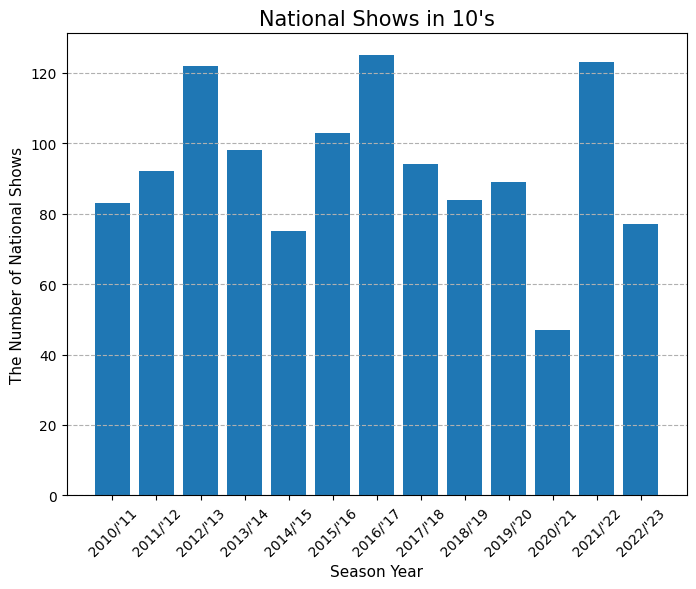

In [48]:
plt.figure(figsize = (8,6))
plt.bar(season_10, natShow_10)
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--')

plt.title("National Shows in 10's", fontsize = 15)
plt.xlabel("Season Year", fontsize = 11)
plt.ylabel("The Number of National Shows", fontsize = 11)

plt.show()

### Bar Plot of Foreign Shows in 10's

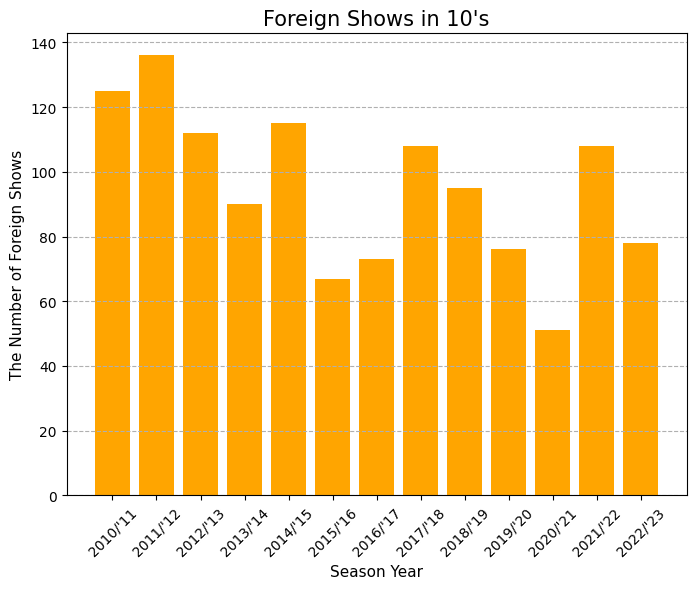

In [49]:
plt.figure(figsize = (8,6))
plt.bar(season_10, forgnShow_10, color = 'orange')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--')


plt.title("Foreign Shows in 10's", fontsize = 15)
plt.xlabel("Season Year", fontsize = 11)
plt.ylabel("The Number of Foreign Shows", fontsize = 11)
plt.show()

 ### Comparison of National & Foreign Shows in 10's

In [50]:
x = np.arange(len(season_10))
width = 0.3

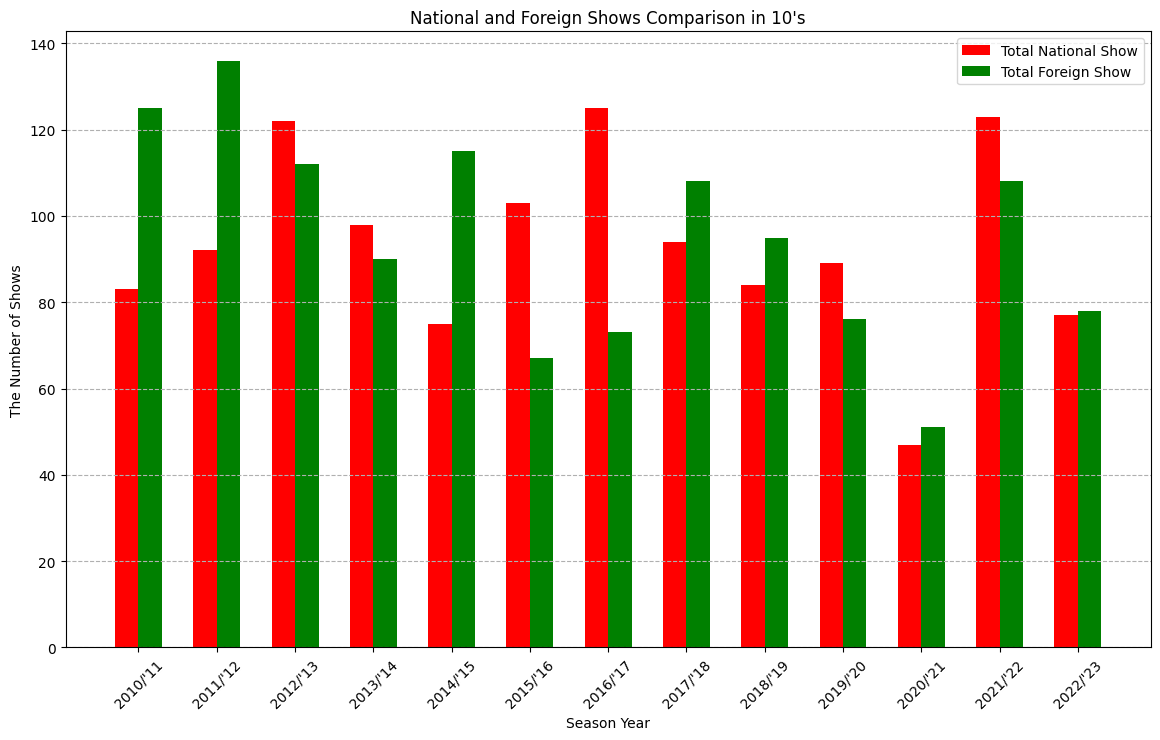

In [51]:
fig, ax = plt.subplots(figsize = (14,8))
ax.bar(x - width/2, natShow_10, width, label = 'Total National Show', color = 'red')
ax.bar(x + width/2, forgnShow_10, width, label = 'Total Foreign Show', color = 'green')

ax.set_title("National and Foreign Shows Comparison in 10's")
ax.set_xlabel("Season Year")
ax.set_ylabel("The Number of Shows")
ax.set_xticks(x)
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--')
ax.set_xticklabels(season_10)
ax.legend()


#plt.savefig('shows_in_2010s.png', dpi = 300, bbox_inches = 'tight') #save the plot as an image
plt.show()

### Stacked Bar Plot

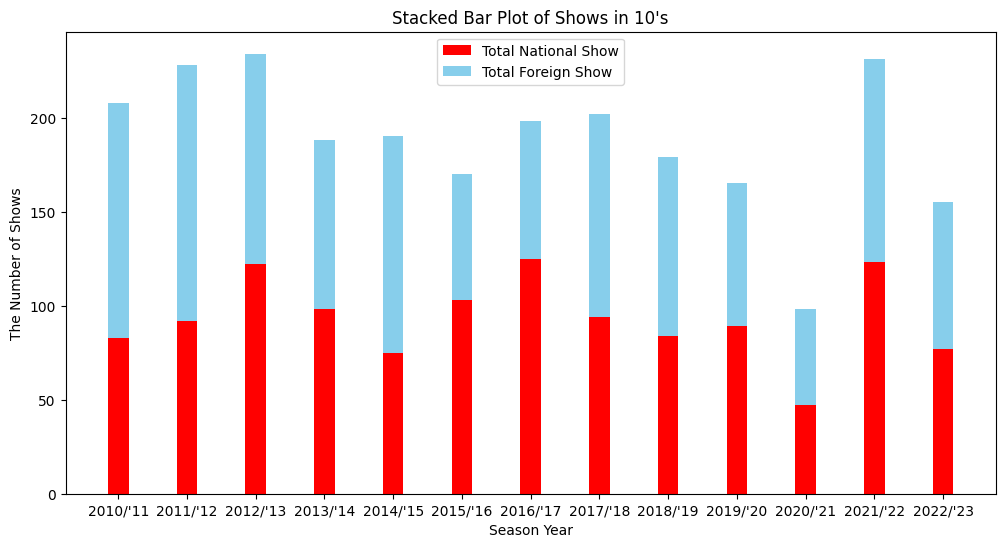

In [52]:
fig, ax = plt.subplots(figsize = (12,6))

ax.bar(season_10, natShow_10, width, label = 'Total National Show', color = 'red')
ax.bar(season_10, forgnShow_10, width, bottom = natShow_10, label = 'Total Foreign Show', color = 'skyblue')

ax.set_title("Stacked Bar Plot of Shows in 10's")
ax.set_xlabel("Season Year")
ax.set_ylabel("The Number of Shows")
ax.set_xticks(x)
ax.set_xticklabels(season_10)
ax.legend()

#plt.savefig('shows_in_2010s_stacked.png', dpi = 300, bbox_inches = 'tight')
plt.show()

## Bar Plots for Shows in 00's

In [53]:
season_00 = df['Season Year'][:11]
natShow_00 = df['National Show'][:11]
forgnShow_00 = df['Foreign Show'][:11]

In [54]:
x_00 = np.arange(len(season_00))
width = 0.3

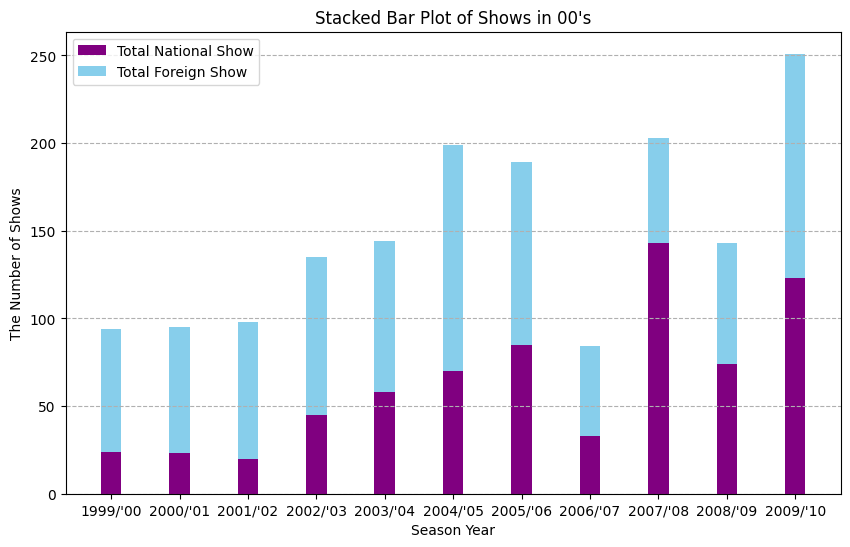

In [55]:
fig, ax = plt.subplots(figsize = (10,6))

ax.bar(season_00, natShow_00, width, label = 'Total National Show', color = 'purple')
ax.bar(season_00, forgnShow_00, width, bottom = natShow_00, label = 'Total Foreign Show', color = 'skyblue')

ax.set_title("Stacked Bar Plot of Shows in 00's")
ax.set_xlabel("Season Year")
ax.set_ylabel("The Number of Shows")
ax.set_xticks(x_00)
ax.set_xticklabels(season_00)
ax.legend()

plt.grid(axis = 'y', linestyle = '--')
plt.savefig('shows_in_2000s_stacked.png', dpi = 300, bbox_inches = 'tight')

plt.show()

### All Seasons in One Graph 

In [56]:
season = df['Season Year']
natShow = df['National Show']
forgnShow = df['Foreign Show']

In [57]:
x = np.arange(len(season))
width = 0.3

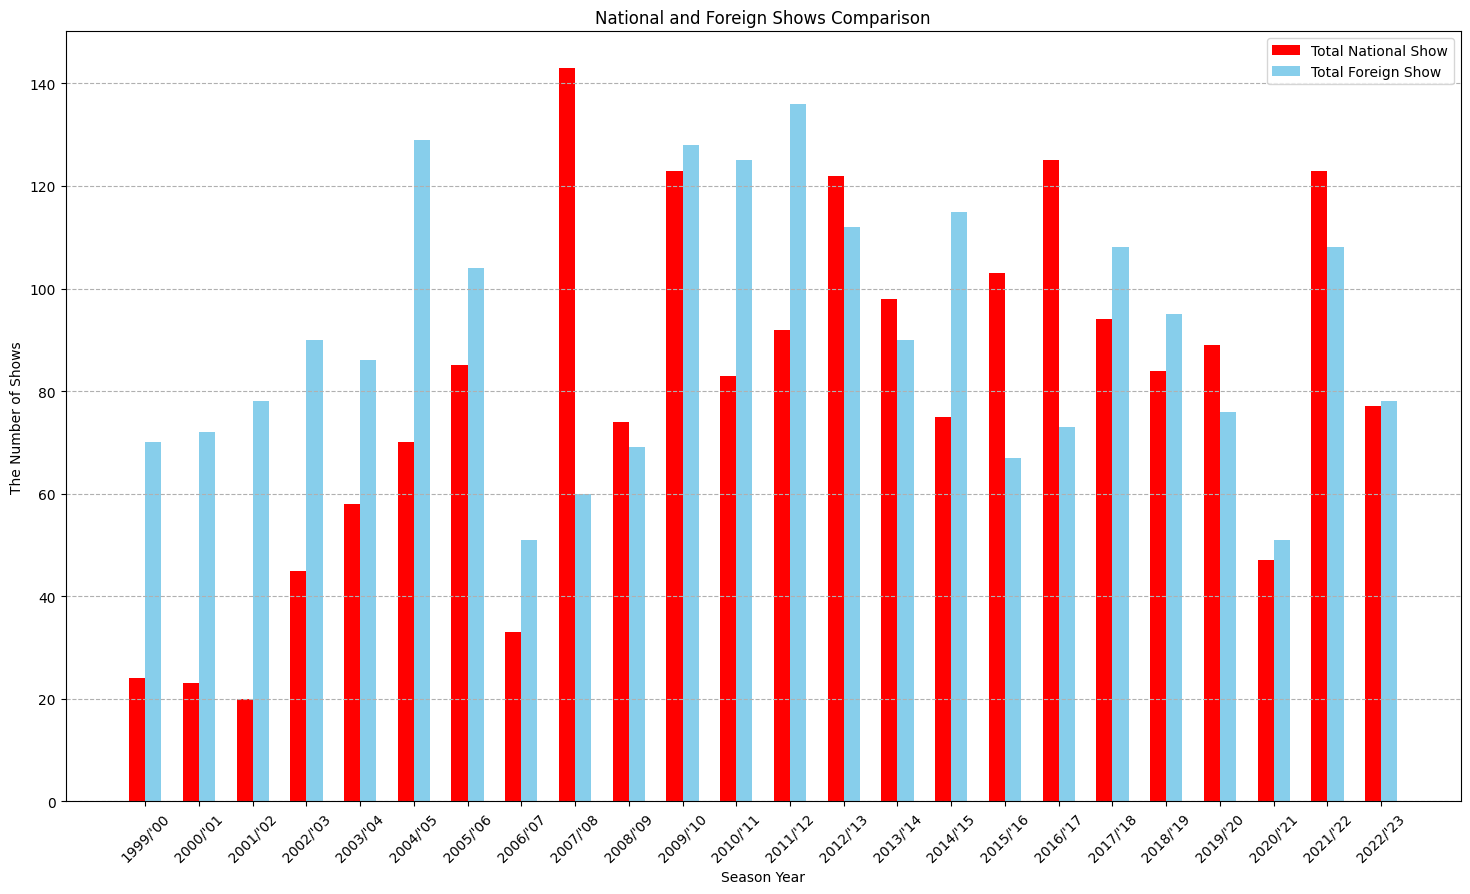

In [58]:
fig, ax = plt.subplots(figsize = (18,10))
ax.bar(x - width/2, natShow, width, label = 'Total National Show', color = 'red')
ax.bar(x + width/2, forgnShow, width, label = 'Total Foreign Show', color = 'skyblue')

ax.set_title("National and Foreign Shows Comparison")
ax.set_xlabel("Season Year")
ax.set_ylabel("The Number of Shows")
ax.set_xticks(x)
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--')
ax.set_xticklabels(season)
ax.legend()


plt.savefig('totalShows.png', dpi = 300, bbox_inches = 'tight') #save the plot as an image
plt.show()

### The Number of Opera and Ballet Halls over the Years

In [62]:
halls = df['The Number of Opera and Ballet Halls']
years = df['Season Year']

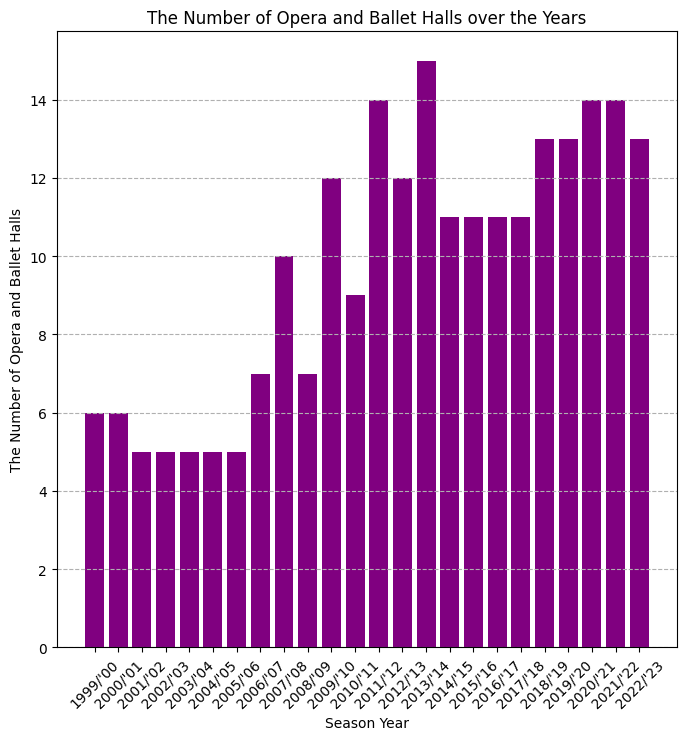

In [81]:
plt.figure(figsize = (8,8))

plt.bar(years, halls, color = 'purple')
plt.title("The Number of Opera and Ballet Halls over the Years")
plt.xlabel("Season Year")
plt.ylabel("The Number of Opera and Ballet Halls")
plt.xticks(rotation = 45)

plt.grid(axis = 'y', linestyle = '--', alpha = 1)

plt.show()

### The Number of Audiences who Watched National/Foreign Shows

In [82]:
audNat = df['The Number of Audiences who Watched National Shows']
forgnNat = df['The Number of Audiences who Watched Foreign Shows']
years = df['Season Year']

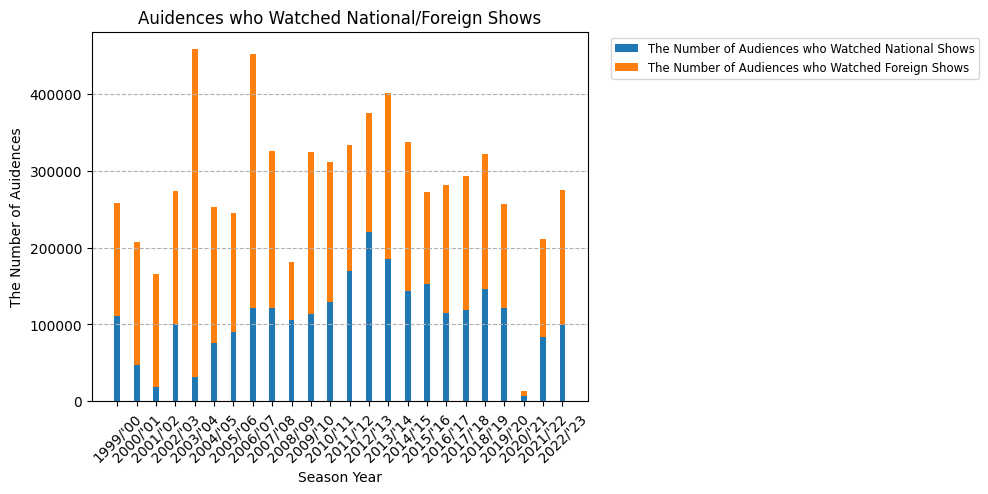

In [98]:
fig, ax = plt.subplots()

ax.bar(years, audNat, width, label = 'The Number of Audiences who Watched National Shows')
ax.bar(years, forgnNat, width, bottom = audNat, label = 'The Number of Audiences who Watched Foreign Shows')

ax.set_title("Auidences who Watched National/Foreign Shows")
ax.set_xlabel("Season Year")
ax.set_ylabel("The Number of Auidences")
plt.xticks(rotation = 45)
ax.grid(axis = 'y', linestyle = '--')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend(loc = 'upper right', bbox_to_anchor=(1.8, 1), fontsize = 'small')

plt.show()

We can easily see _the effect of the COVID-19 pandemic_ on shows. The number of performances decreased dramatically in the 2020-2021 season.

Over the years, we can see that the number of national shows has increased, of course influenced by certain factors in Turkish politics. Naturally, the also increases the number of audiences watching national shows. However, considering, the frequently performed, classic shows in the theater seasons are in foreign languages, it is not difficult to predict that the number of foreign shows auidences will not decrease.